# Solving (Mixed) Integer Linear Programming Models
## Mehmet Gönen
## November 21, 2022

In [1]:
# load libraries
import numpy as np
import scipy.sparse as sp

import cplex as cp

In [2]:
def mixed_integer_linear_programming(direction, A, senses, b, c, l, u, types):
    # create an empty optimization problem
    prob = cp.Cplex()

    # add decision variables to the problem including their coefficients in objective and ranges
    prob.variables.add(obj = c.tolist(), lb = l.tolist(), ub = u.tolist(), types = types.tolist())

    # define problem type
    if direction == "maximize":
        prob.objective.set_sense(prob.objective.sense.maximize)
    else:
        prob.objective.set_sense(prob.objective.sense.minimize)

    # add constraints to the problem including their directions and right-hand side values
    prob.linear_constraints.add(senses = senses.tolist(), rhs = b.tolist())

    # add coefficients for each constraint
    row_indices, col_indices = A.nonzero()
    prob.linear_constraints.set_coefficients(zip(row_indices.tolist(), col_indices.tolist(), A.data.tolist()))

    # solve the problem
    print(prob.write_as_string())
    prob.solve()

    # check the solution status
    print(prob.solution.get_status())
    print(prob.solution.status[prob.solution.get_status()])

    # get the solution
    x_star = prob.solution.get_values()
    obj_star = prob.solution.get_objective_value()

    return(x_star, obj_star)

## The assignment problem
Suppose, for example, than $N$ people are to be assigned to $N$ jobs and that $c_{ij}$ measures the performance of person $i$ in job $j$. If we let

\begin{align*}
x_{ij} = \begin{cases} 1 & \textrm{if person $i$ is assigned to job $j$}\\
0 & \textrm{otherwise,}\end{cases}
\end{align*}

we can find the optimal assignment by solving the optimization problem:

\begin{align*}
\mbox{maximize} \;\;& \sum\limits_{i = 1}^{N} \sum\limits_{j = 1}^{N} c_{ij} x_{ij} \\
\mbox{subject to:} \;\;& \sum\limits_{j = 1}^{N} x_{ij} = 1 \;\;\;\; i = 1, 2, \dots, N\\
\;\;& \sum\limits_{i = 1}^{N} x_{ij} = 1 \;\;\;\; j = 1, 2, \dots, N\\
\;\;& x_{ij} \in \{0, 1\} \;\;\;\; i = 1, 2, \dots, N; j = 1, 2, \dots, N
\end{align*}

The first set of constraints shows that each person is to be assigned to exactly one job and the second set of constraints indicates that each job is to be performed by one person.

\begin{align*}
\mbox{maximize} \;\;& c_{11}x_{11} + c_{12}x_{12} + c_{13}x_{13} + c_{21}x_{21} + c_{22}x_{22} + c_{23}x_{23} + c_{31}x_{31} + c_{32}x_{32} + c_{33}x_{33} \\
\mbox{subject to:} \;\;& + x_{11} + x_{12} + x_{13} \phantom{ + x_{21} + x_{22} + x_{23} + x_{31} + x_{32} + x_{33}\:\:} = 1\\
\;\;& \phantom{+ x_{11} + x_{12} + x_{13}\:\:} + x_{21} + x_{22} + x_{23} \phantom{+ x_{31} + x_{32} + x_{33}\:\:} = 1\\
\;\;& \phantom{+ x_{11} + x_{12} + x_{13} + x_{21} + x_{22} + x_{23}\:\:} + x_{31} + x_{32} + x_{33} = 1\\
\;\;& + x_{11} \phantom{+ x_{12} + x_{13}\:\:} + x_{21} \phantom{+ x_{22} + x_{23}\:\:} + x_{31} \phantom{+ x_{32} + x_{33}\:\:} = 1\\
\;\;& \phantom{+ x_{11}\:\:} + x_{12} \phantom{+ x_{13} + x_{21}\:\:} + x_{22} \phantom{+ x_{23} + x_{31}\:\:} + x_{32} \phantom{+ x_{33}\:\:} = 1\\
\;\;& \phantom{+ x_{11} + x_{12}\:\:} + x_{13} \phantom{+ x_{21} + x_{22}\:\:} + x_{23} \phantom{+ x_{31} + x_{32}\:\:} + x_{33} = 1\\
\;\;& x_{11} \in \{0, 1\}\\
\;\;& x_{12} \in \{0, 1\}\\
\;\;& x_{13} \in \{0, 1\}\\
\;\;& x_{21} \in \{0, 1\}\\
\;\;& x_{22} \in \{0, 1\}\\
\;\;& x_{23} \in \{0, 1\}\\
\;\;& x_{31} \in \{0, 1\}\\
\;\;& x_{32} \in \{0, 1\}\\
\;\;& x_{33} \in \{0, 1\}
\end{align*}

[[1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1.]]


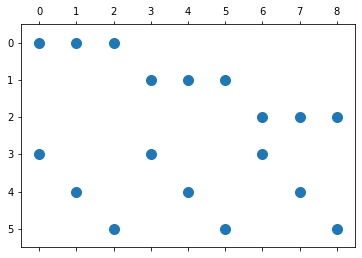

In [3]:
names = np.array(["x_1_1", "x_1_2", "x_1_3", "x_2_1", "x_2_2", "x_2_3", "x_3_1", "x_3_2", "x_3_3"])
c = np.array([27, 55, 90, 13, 48, 39, 92, 41, 61])
senses = np.repeat("E", 6)
b = np.repeat(1, 6)
l = np.repeat(0, 9)
u = np.repeat(1, 9)
types = np.repeat("B", 9)

A = np.zeros((6, 9))
# person 1
A[0, 0] = 1
A[0, 1] = 1
A[0, 2] = 1
# person 2
A[1, 3] = 1
A[1, 4] = 1
A[1, 5] = 1
# person 3
A[2, 6] = 1
A[2, 7] = 1
A[2, 8] = 1
# job 1
A[3, 0] = 1
A[3, 3] = 1
A[3, 6] = 1
# job 2
A[4, 1] = 1
A[4, 4] = 1
A[4, 7] = 1
# job 3
A[5, 2] = 1
A[5, 5] = 1
A[5, 8] = 1

print(A)
A = sp.csr_matrix(A)

import matplotlib.pyplot as plt
plt.figure(figsize = (6, 9))
plt.spy(A, marker = "o")
plt.show()

In [4]:
x_star, obj_star = mixed_integer_linear_programming("maximize", A, senses, b, c, l, u, types)
print(names)
print(x_star)
print(obj_star)

print(np.array(x_star).reshape((3, 3)))

Default variable names x1, x2 ... being created.
Default row names c1, c2 ... being created.


\ENCODING=ISO-8859-1
\Problem name: 

Maximize
 obj1: 27 x1 + 55 x2 + 90 x3 + 13 x4 + 48 x5 + 39 x6 + 92 x7 + 41 x8 + 61 x9
Subject To
 c1: x1 + x2 + x3  = 1
 c2: x4 + x5 + x6  = 1
 c3: x7 + x8 + x9  = 1
 c4: x1 + x4 + x7  = 1
 c5: x2 + x5 + x8  = 1
 c6: x3 + x6 + x9  = 1
Bounds
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1
 0 <= x5 <= 1
 0 <= x6 <= 1
 0 <= x7 <= 1
 0 <= x8 <= 1
 0 <= x9 <= 1
Binaries
 x1  x2  x3  x4  x5  x6  x7  x8  x9 
End

Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 136.000000 after 0.06 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 6 rows, 9 columns, and 18 nonzeros.
Reduced MIP has 9 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.07 sec. (0.01 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 6 rows, 9 columns, and 18 nonzeros.
Reduced MIP has 9 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve t

In [5]:
def assignment_problem(filename):
    # read problem instance from file
    problem = np.loadtxt(filename)

    N = np.sqrt(problem.shape[0]).astype(int)

    c = problem[:, 2]
    senses = np.repeat("E", 2 * N)
    b = np.repeat(1, 2 * N)
    l = np.repeat(0, N * N)
    u = np.repeat(1, N * N)
    types = np.repeat("B", N * N)

    aij = np.repeat(1.0, 2 * N * N)
    row = np.repeat(range(2 * N), N)
    col = np.concatenate((range(N * N), 
                          np.array(range(N * N)).reshape(N, N).T.flatten()))
    A = sp.csr_matrix((aij, (row, col)), shape = (2 * N, N * N))

    x_star, obj_star = mixed_integer_linear_programming("maximize", A, senses, b, c, l, u, types)
    return(x_star, obj_star)

In [6]:
x_star, obj_star = assignment_problem("assignment_problem1.txt")
print(x_star)
print(obj_star)

print(np.array(x_star).reshape((3, 3)))

Default variable names x1, x2 ... being created.
Default row names c1, c2 ... being created.


\ENCODING=ISO-8859-1
\Problem name: 

Maximize
 obj1: 27 x1 + 55 x2 + 90 x3 + 13 x4 + 48 x5 + 39 x6 + 92 x7 + 41 x8 + 61 x9
Subject To
 c1: x1 + x2 + x3  = 1
 c2: x4 + x5 + x6  = 1
 c3: x7 + x8 + x9  = 1
 c4: x1 + x4 + x7  = 1
 c5: x2 + x5 + x8  = 1
 c6: x3 + x6 + x9  = 1
Bounds
 0 <= x1 <= 1
 0 <= x2 <= 1
 0 <= x3 <= 1
 0 <= x4 <= 1
 0 <= x5 <= 1
 0 <= x6 <= 1
 0 <= x7 <= 1
 0 <= x8 <= 1
 0 <= x9 <= 1
Binaries
 x1  x2  x3  x4  x5  x6  x7  x8  x9 
End

Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 136.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 6 rows, 9 columns, and 18 nonzeros.
Reduced MIP has 9 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (0.01 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
Reduced MIP has 6 rows, 9 columns, and 18 nonzeros.
Reduced MIP has 9 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve t

In [7]:
N = 10
C = np.random.randint(10, 100, (N, N))

row_indices, col_indices = C.nonzero()

problem = np.vstack((row_indices + 1, col_indices + 1, C.reshape(1, N * N))).T
np.savetxt("assignment_problem2.txt", problem, fmt = "%d")

x_star, obj_star = assignment_problem("assignment_problem2.txt")
print(x_star)
print(obj_star)
print(np.array(x_star).reshape((N, N)))

Default variable names x1, x2 ... being created.
Default row names c1, c2 ... being created.


\ENCODING=ISO-8859-1
\Problem name: 

Maximize
 obj1: 96 x1 + 29 x2 + 54 x3 + 34 x4 + 91 x5 + 14 x6 + 50 x7 + 31 x8 + 24 x9
       + 11 x10 + 18 x11 + 84 x12 + 53 x13 + 67 x14 + 97 x15 + 87 x16 + 12 x17
       + 45 x18 + 13 x19 + 45 x20 + 50 x21 + 93 x22 + 36 x23 + 55 x24 + 14 x25
       + 43 x26 + 66 x27 + 59 x28 + 71 x29 + 30 x30 + 16 x31 + 35 x32 + 73 x33
       + 39 x34 + 39 x35 + 77 x36 + 78 x37 + 22 x38 + 82 x39 + 74 x40 + 84 x41
       + 85 x42 + 76 x43 + 96 x44 + 57 x45 + 95 x46 + 83 x47 + 70 x48 + 31 x49
       + 45 x50 + 41 x51 + 36 x52 + 18 x53 + 44 x54 + 29 x55 + 61 x56 + 93 x57
       + 13 x58 + 68 x59 + 99 x60 + 15 x61 + 48 x62 + 24 x63 + 10 x64 + 93 x65
       + 97 x66 + 50 x67 + 11 x68 + 88 x69 + 94 x70 + 56 x71 + 55 x72 + 11 x73
       + 15 x74 + 23 x75 + 16 x76 + 54 x77 + 66 x78 + 43 x79 + 54 x80 + 54 x81
       + 61 x82 + 25 x83 + 74 x84 + 15 x85 + 28 x86 + 46 x87 + 74 x88 + 59 x89
       + 33 x90 + 60 x91 + 36 x92 + 50 x93 + 34 x94 + 25 x95 + 18 x96 + 72 x97
       